# **Imports**

In [1]:
# data handle
from pandas._libs.tslibs.timestamps import Timestamp

import pandas as pd
import numpy as np

# graphs
import matplotlib.pyplot as plt
import seaborn as sns

# system
import os

In [2]:
# setting up evironment configs
sns.set()
pd.set_option('display.max_columns', None)
%matplotlib inline

---
<h1>Matheus' Notes</h1>
<ul>
    <li>Target column: AverageTemperature</li>
    <li>The target column is in celsius</li>
    <li>I will only considerer Brazil data for this analysis</li>
    <li>The independent values will be the year and month only</li>
    <ul>
        <li>I will split the date into year and month for this reason</li>
    </ul>
    <li>The date comes since 1850 until 2013, totalizing 1957 data to be used</li>
</ul>

---

# **Data preparation**

In [3]:
# loading dataset
df = pd.read_csv('../datasets/GlobalLandTemperaturesByCountry.csv')

In [4]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [6]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [7]:
# verifying if 'dt' columns is a string or
# if it is in date format
type(df.iloc[0,0])

str

In [8]:
# converting all content in 'dt' column
# to datetime format
df.dt = pd.to_datetime(df.dt)

In [9]:
# validating this transformation
type(df.iloc[0,0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# selecting only Brazil
df_brazil = df[df.Country == 'Brazil']

In [11]:
# checking the shape of new dataset
df_brazil.shape

(2181, 4)

In [12]:
# verfying unique dates
df_brazil.dt.value_counts()

1832-01-01    1
1953-06-01    1
1952-12-01    1
1953-01-01    1
1953-02-01    1
             ..
1892-02-01    1
1892-01-01    1
1891-12-01    1
1891-11-01    1
2013-09-01    1
Name: dt, Length: 2181, dtype: int64

In [13]:
# order dataset by dates
df_brazil.sort_values(by='dt', inplace=True)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_14240\2596131912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil.sort_values(by='dt', inplace=True)


In [14]:
df_brazil.head(15)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
77110,1832-01-01,24.935,1.372,Brazil
77111,1832-02-01,24.505,1.953,Brazil
77112,1832-03-01,24.617,1.359,Brazil
77113,1832-04-01,23.990,2.013,Brazil
77114,1832-05-01,23.124,1.592,Brazil
77115,1832-06-01,22.924,1.528,Brazil
77116,1832-07-01,22.974,1.930,Brazil
77117,1832-08-01,22.741,1.568,Brazil
77118,1832-09-01,23.560,1.996,Brazil
77119,1832-10-01,24.718,1.592,Brazil


In [15]:
# verifying if there are any nan value
df_brazil.isna().sum()

dt                                0
AverageTemperature               17
AverageTemperatureUncertainty    17
Country                           0
dtype: int64

In [16]:
df_brazil[df_brazil.AverageTemperature.isna()]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
77254,1844-01-01,NaN,NaN,Brazil
77255,1844-02-01,NaN,NaN,Brazil
77256,1844-03-01,NaN,NaN,Brazil
77257,1844-04-01,NaN,NaN,Brazil
77258,1844-05-01,NaN,NaN,Brazil
77259,1844-06-01,NaN,NaN,Brazil
77260,1844-07-01,NaN,NaN,Brazil
77261,1844-08-01,NaN,NaN,Brazil
77262,1844-09-01,NaN,NaN,Brazil
77263,1844-10-01,NaN,NaN,Brazil


In [17]:
# filtering by range of 1850-07-01 and 2013-09-01
df_brazil = df_brazil[(df_brazil.dt > Timestamp('1850-07-01')) & (df_brazil.dt < Timestamp('2013-09-01'))]

In [18]:
# checking if there are any missing dates
first_date = df_brazil.iloc[0,0]
for i in range(1,df_brazil.shape[0]):
    current_date = df_brazil.iloc[i,0]
    count = ((current_date.year - first_date.year) * 12) + current_date.month - first_date.month
    if not i == count:
        print(f'missing value at index {i}')
print('Dataset validated')

Dataset validated


In [19]:
# spliting date into year and month column
def date_to_year_and_month(x):
    x = str(x).split('-')
    return int(x[0]), int(x[1])
df_brazil[['year','month']] = list(df_brazil['dt'].map(date_to_year_and_month).values)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_14240\2217410464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil[['year','month']] = list(df_brazil['dt'].map(date_to_year_and_month).values)
C:\Users\Matheus\AppData\Local\Temp\ipykernel_14240\2217410464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil[['year','month']] = list(df_brazil['dt'].map(date_to_year_and_month).values)


In [20]:
df_brazil.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month
77333,1850-08-01,24.176,0.942,Brazil,1850,8
77334,1850-09-01,24.551,0.960,Brazil,1850,9
77335,1850-10-01,24.468,1.004,Brazil,1850,10
77336,1850-11-01,24.604,1.289,Brazil,1850,11
77337,1850-12-01,24.643,1.018,Brazil,1850,12


C:\Users\Matheus\AppData\Local\Temp\ipykernel_14240\2116743083.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df_brazil.dt[:500],
C:\Users\Matheus\AppData\Local\Temp\ipykernel_14240\2116743083.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df_brazil.AverageTemperature[:500],


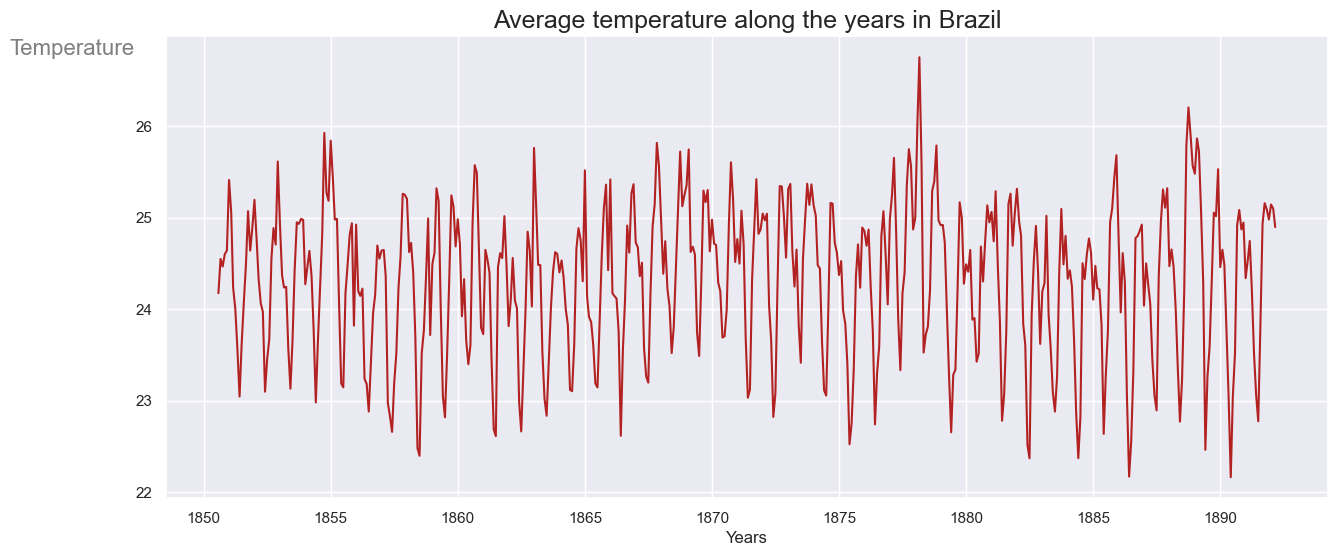

In [21]:
# visualizing temperature by time (first 500 data)
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(
    df_brazil.dt[:500],
    df_brazil.AverageTemperature[:500],
    c='firebrick'
)

ax.set_xlabel('Years')

ax.set_ylabel(
    'Temperature',
    rotation=0,
    fontsize=16,
    color='gray'
)
ax.yaxis.set_label_coords(-.08, 0.95)

ax.set_title('Average temperature along the years in Brazil', fontsize=18)

plt.show()

In [22]:
# filtering columns that will be
# used to train the model
df_final = df_brazil[['year', 'month', 'AverageTemperature']]

In [23]:
# renaming temperature column name
df_final.columns = df_final.columns.str.replace('AverageTemperature', 'temperature')

In [24]:
df_final.head()

,year,month,temperature
77333,1850,8,24.176
77334,1850,9,24.551
77335,1850,10,24.468
77336,1850,11,24.604
77337,1850,12,24.643


In [25]:
df_final.describe()

,year,month,temperature
count,1957.000000,1957.000000,1957.000000
mean,1931.624936,6.500766,24.763883
std,47.091721,3.452219,0.955518
min,1850.000000,1.000000,21.797000
25%,1891.000000,4.000000,24.152000
50%,1932.000000,7.000000,24.910000
75%,1972.000000,9.000000,25.487000
max,2013.000000,12.000000,27.151000


In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 77333 to 79289
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1957 non-null   int64  
 1   month        1957 non-null   int64  
 2   temperature  1957 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 125.7 KB


In [26]:
# saving dataset into csv file
df_final.to_csv('../datasets/avg_temp_in_brazil.csv')